# Script test SNR

En este archivo lo que busco es añadir ruido a la señal original y trabajar a partir de ahí, en los modelos finales donde se trabajará con perturbaciones, se hará a través de los algoritmos finales, este simplemente sirve como plantilla.

### Se añaden las bibliotecas necesarias

In [3]:
import numpy as np
import os
import matplotlib.pyplot as plt
import scipy.io as sio

### Carga de archivos

En la siguiente parte del código, cargamos la señal original, en este caso no vamos a hacer un barrido de las 3600 señales, simplemente vamos a cargar la primera señal y vamos a añadir distintos niveles de ruido, se va a representar para entender el funcionamiento para que pueda ser aplicado.

Para poder usarlo, se va a usar el mismo código que en la generación de perturbaciones, pero en este caso solo usaremos range(1), para no tener que editar demasiado el código, además de que vamos a aplicar solo una señal, se eliminar varias carpetas a crear.

In [4]:
# Obtener el directorio actual del script
# directorio_actual = os.path.abspath(os.path.dirname(__file__)) Funcionaba cuando era un archivo '.py'
directorio_actual = os.path.dirname(os.path.abspath('disturbance_creator'))
directorio_destino = os.path.join(directorio_actual, 'SNR_signals')

# Creamos todas las carpetas antes de iniciar el bucle.

os.makedirs(directorio_destino, exist_ok=True)
os.makedirs(os.path.join('SNR_signals', '20_dB'), exist_ok=True)

def dB_generator():
    for i in range(2):
        nombre_archivo = f"or_s_{i}.npy"
        ruta_archivo = os.path.join(directorio_actual, 'original_signal', nombre_archivo)

        if os.path.exists(ruta_archivo):
            # print(f"Se encontró el archivo {nombre_archivo}")
            # Cargar los datos desde el archivo .npy
            data = np.load(ruta_archivo)
            # Normalizar la señal al rango [-1, 1]
            signal_original = data / np.sqrt(np.mean(data**2))

            # Seleccionamos un objetivo de Ruido.
            Obj_snr_db = 20
            # Calculamos el poder de la señal y la pasamos a dB
            # Necesitamos calcular la potencia, en este caso sería:
            x_watts = signal_original ** 2
            
            sig_avg_watts = np.mean(x_watts)
            sig_avg_db = 10 * np.log10(sig_avg_watts)
            # Calculate noise according to [2] then convert to watts
            noise_avg_db = sig_avg_db - Obj_snr_db
            noise_avg_watts = 10 ** (noise_avg_db / 10)
            # Generamos una muestra de ruido blanco.
            mean_noise = 0
            noise_volts = np.random.normal(mean_noise, np.sqrt(noise_avg_watts), len(x_watts))
            # Sumamos el ruido a la señal
            signal_20dB = signal_original + noise_volts

            # Guardar la señal con ruido en un archivo nuevo    
            if i < 3:
                directorio_destino_final = os.path.join(directorio_destino, '20_dB')
            else:
                print(f"No se encontró el archivo {nombre_archivo}")
            
            
            nombre_archivo_nuevo = f"20dB_s_{i}.npy"
            ruta_archivo_nuevo = os.path.join(directorio_destino_final, nombre_archivo_nuevo)
            np.save(ruta_archivo_nuevo, signal_20dB)
            #print(f"Señal amplificada guardada en {nombre_archivo_nuevo}")
        #else:
            #print(f"No se encontró el archivo {nombre_archivo}")

dB_generator()

### Representación de la señal con Ruido

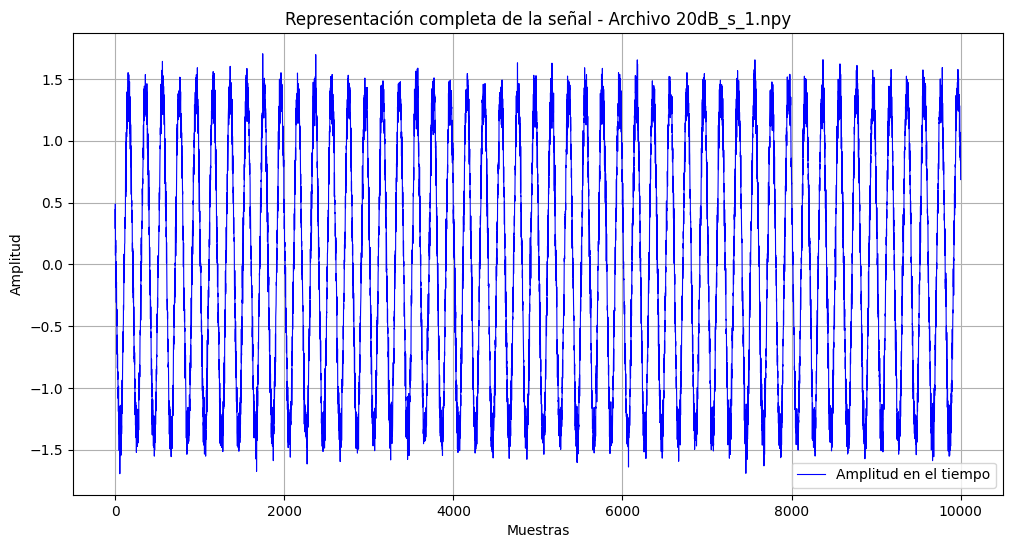

In [5]:
archivo_path = os.path.join(os.getcwd(), 'SNR_signals', '20_dB' , f'20dB_s_1.npy')

# Cargar el archivo completo
signal_data = np.load(archivo_path)

# Graficar todos los datos de la señal
plt.figure(figsize=(12, 6))
plt.plot(signal_data, color='b', linestyle='-', linewidth=0.8, label='Amplitud en el tiempo')
plt.title(f"Representación completa de la señal - Archivo 20dB_s_1.npy")
plt.xlabel("Muestras")
plt.ylabel("Amplitud")
plt.legend()
plt.grid(True)
plt.show()